# Exercises: Swarm Intelligence

1. (PSO) [2 points] Suppose you want to use a PSO system to maximize the function
$$f(x) = \sum_{i=1}^{2}(-x(i)) sin(\sqrt{( \mid x(i) \mid)}),$$
where $−500 ≤ x(i) ≤ 500$. A graph of this function is shown in the slides of the lecture (the function’s global maximum is at $f(x) = 837.9658$ for $x(i) = −420.9687, i = 1,2)$.
Consider an illustrative example of a PSO system for composed of three particles. The space of solutions is a two dimensional real valued space: $−500 ≤ x(i) ≤ 500$. Consider the update rule for each particle $i$:

$$ v_i = \omega v_i + \alpha_1 r_1 (x_i^* - x_i) + \alpha_1 r_2 (x^* - x_i),  $$

where $x_i^*$ denotes the personal best and $x^∗$ the social (global) best. To facilitate calculation, for this exercise we will ignore the fact that $r_1$ and $r_2$ are random numbers and fix them to $0.5$ and $α_1 = α_2 = 1$. Suppose the current state of the swarm is as follows.


*   Position of particles: $x1 = (−400, −400); x2 = (−410, −410); x3 = (−415, −415)$;
*  Individual best positions: $x_1^∗ = x_1; x_2^* = x_2; x_3^* = x_3$;
* Social best position: $x^∗ = x_3$;
* Velocities: $v_1 = v_2 = v_3 = (−50, −50)$



(a) Compute the fitness of each particle.

(b) What would be the next position and fitness of each particle after one iteration of th PSO algorithm, when using $\omega=2$,$\omega=0.5$,and $\omega=0.1$? (Incase a component of a new position falls outside the range $−500 ≤ x(i) ≤ 500$, it is mapped to its closest value in the range. For instance, if the computation of new position gives $(550, 500)$, it is set to $(500, 500)$.)

(c) Explain what is the effect of the parameter $\omega$.

(d) Give an advantage and a disadvantage of a high value of $\omega$.





In [ ]:
import numpy as np
import math

def fitness(x):
  return sum([(-x[i])*math.sin(math.sqrt(abs(x[i]))) for i in range(2)])

def newVal(old_v, omega, alpha1, alpha2, r1, r2, old_x, local_best, global_best,):
  return omega*old_v + alpha1*r1*(local_best - old_x) + alpha2*r2*(global_best - old_x)

omega_list = [2, 0.5, 0.1]
r1, r2 = 0.5, 0.5
alpha1, alpha2 = 1, 1
x1, x2, x3 = np.array([-400, -400]), np.array([-410, -410]), np.array([-415, -415])
x_list = [x1, x2, x3]
v1, v2, v3 = np.array([-50, -50]), np.array([-50, -50]), np.array([-50, -50])
v_list = [v1, v2, v3]

print("a)")
for x in x_list:
  print("The fitness function of x=" + str(x) + " is " + str(fitness(x)) + ".")

print("b)")
for omega in omega_list:
  for j in range(3):
    new_v = newVal(v_list[j], omega, alpha1, alpha2, r1, r2, x_list[j], x_list[j], x_list[2])
    x = x_list[j] + new_v
    if(x[0] < -500):
      x[0] = -500
    if(x[0] > 500):
      x[0] = 500
    if(x[1] < -500):
      x[1] = -500
    if(x[1] > 500):
      x[1] = 500
    print("The new value for x" + str(j+1) + "=" + str(x_list[j]) + " when using omega=" + str(omega) + " is " + str(x) + " with fitness " + str(fitness(x)) + ".")

a)
The fitness function of x=[-400 -400] is 730.3562005821021.
The fitness function of x=[-410 -410] is 807.9150929576671.
The fitness function of x=[-415 -415] is 829.0117583869608.
b)
The new value for x1=[-400 -400] when using omega=2 is [-500. -500.] with fitness -361.1783170627835.
The new value for x2=[-410 -410] when using omega=2 is [-500. -500.] with fitness -361.1783170627835.
The new value for x3=[-415 -415] when using omega=2 is [-500. -500.] with fitness -361.1783170627835.
The new value for x1=[-400 -400] when using omega=0.5 is [-432.5 -432.5] with fitness 804.4822309250023.
The new value for x2=[-410 -410] when using omega=0.5 is [-437.5 -437.5] with fitness 769.4947716725984.
The new value for x3=[-415 -415] when using omega=0.5 is [-440. -440.] with fitness 747.5297044219257.
The new value for x1=[-400 -400] when using omega=0.1 is [-412.5 -412.5] with fitness 819.9905472762648.
The new value for x2=[-410 -410] when using omega=0.1 is [-417.5 -417.5] with fitness 834.

c) \
omega (ω) is the inertia parameter. It keeps the particle moving in the same direction and velocity. If the parameter omega > 1 then the particles might move too far in their own direction ignoring the swarm. If omege < 1 then they might move too slow and even stop. \
d) \
A disadvanteage of a high value of omega was given in c), the particle could not take the swarm into account enough and keep on going on it's course even if it's wrong. The advantage would be that if it's on the right course it will converge quickly.

2. (PSO) [2 points] Consider a particle “swarm” consisting of a single member. How would it perform in a trivial task such as the minimization of $f(x) = x^2$ when $\omega < 1$, assuming the particle starts with the velocity pointing away from the optimum (e.g. in a state with velocity $v = 10$; position $x = 20$)?

In [ ]:
omega_list = [0.9, 0.6, 0.2, 0.001]

for omega in omega_list:
  v = 10
  x = 20 
  print("First 10 value for omega=" + str(omega))
  for i in range(20):
    new_v = omega*v + alpha1*r1*(x - x) + alpha2*r2*(x - x)
    x = x + new_v
    fitness = x**2
    v = new_v
    print(fitness)

## Both local and global x are the only possible option which is x, so the two portions to the right are 0 whcih leaves omega*x

First 10 value for omega=0.9
841.0
1376.41
1970.4721
2596.004401
3232.59336481
3865.1474454961
4482.74156885184
5077.695594969991
5644.840863705693
6180.937788203611
6684.214628186725
7154.003366598868
7590.453292935939
7994.306676669882
8366.723966555199
8709.148415517047
9023.20201891541
9310.606257433425
9573.122428421822
9812.50739093235
First 10 value for omega=0.6
676.0
876.1600000000001
1008.6976000000001
1092.6991360000004
1144.7124889600002
1176.5009760256003
1195.7830393692163
1207.4275069729179
1214.4412701902504
1218.65927787649
1221.1935924003365
1222.7154446830014
1223.6290109372085
1224.177314448192
1224.5063555078273
1224.703801366705
1224.822276522346
1224.8933643662442
1224.9360180627677
1224.9616106371482
First 10 value for omega=0.2
484.0
501.75999999999993
505.35039999999987
506.0700159999998
506.21400063999977
506.2428000255998
506.2485600010238
506.2497120000408
506.2499424000015
506.2499884799999
506.2499976959998
506.2499995391998
506.2499999078398
506.24999998

The particle swarm would converge further and further from the point we are looking for, maximizing it instead of minimizing. The smaller the omega, the slower the maximization.

3. (PSO) [2 points] Implement the PSO algorithm for clustering described in “Van der Merwe, D. W., and Andries Petrus Engelbrecht. ”Data clustering using particle swarm optimization.” Evolutionary Computation, 2003. CEC’03. The 2003 Congress on. Vol. 1. IEEE, 2003.” (see also swarm intelligence slides). Implement the k-means clustering.

Apply and compare the performance of the two algorithms in terms of quantization error on Artificial dataset 1 and on the Iris dataset (the latter available at UCI ML repository, see https://archive.ics.uci.edu/ml/datasets/iris). In both algorithms, use the true number of clusters as value of the parameter for setting the number of clusters.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.datasets import load_iris

#Load or generate dataset

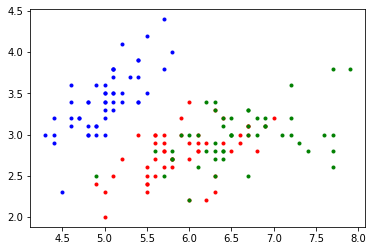

In [ ]:
datasetName = 'iris' # you can select 'gen' or 'iris'
if datasetName == 'gen': #'gen' stands for the generated (Artificial)
  num_data = 400
  lb = -1
  ub = 1
  data = np.random.rand(num_data , 2)*(ub-lb) + lb
  label = np.zeros((num_data))
  for i in range(num_data):
    if data[i,0] >= 0.7 or (data[i,0]<= 0.3 and data[i,1] >= -0.2 - data[i,0]):
      label[i] = 1
    else:
      label[i] = 0
    plt.plot(data[label==0,0],data[label==0,1],'.b')  
    plt.plot(data[label==1,0],data[label==1,1],'.r')
    
else:
  data = load_iris()
  label = data['target']
  data = data['data']
  plt.plot(data[label==0,0],data[label==0,1],'.b')  
  plt.plot(data[label==1,0],data[label==1,1],'.r')
  plt.plot(data[label==2,0],data[label==2,1],'.g')
  num_data = 150
  n_cluster = len(set(label))
  lb = np.tile(np.min(data,axis=0) , n_cluster)
  ub = np.tile(np.max(data,axis=0) , n_cluster)

n_cluster = len(set(label))
dim_data = np.size(data, axis = 1)

#Initializing parameters

In [ ]:
t_max = 100
Pmax = 50
dim = dim_data * n_cluster
w = 0.4
c1 = 1
c2 = 1

In [ ]:
def getFitness(x):
   x = x.reshape((n_cluster , dim_data))
   D = distance_matrix(x, data)
   idx = np.argmin(D , axis = 0)
   D = np.min(D , axis = 0)
   J = 0
   for i in range(n_cluster):
     J = J + np.sum(D[idx == i])

   J = J / n_cluster
   return J

#Initializing population

In [ ]:
X = np.random.rand(Pmax , dim) * (ub - lb) + lb
V = np.random.randn(Pmax , dim)
P = np.array(X)

Fit_X = np.ones(Pmax) * np.infty
Fit_P = np.ones_like(Fit_X) * np.infty

X_best = np.zeros_like(X[0])
Fit_best = np.infty

#Main loop

In [ ]:
plot_best = []
for T in range(t_max):

  # Get fitness of each individual
  for i in range(Pmax):
    Fit_X[i] = getFitness(X[i])

  # Update Personal bests
  P[Fit_X < Fit_P ,] = np.array(X[Fit_X < Fit_P ,])
  Fit_P[Fit_X < Fit_P] = np.array(Fit_X[Fit_X < Fit_P])

  # Update Global best
  if Fit_X.min() < Fit_best :
    X_best = X[np.argmin(Fit_X)]
    Fit_best = Fit_X.min()

  # Calculate velocity  
  for i in range(Pmax):
    for d in range(dim):
      V[i,d] = w * V[i,d] + c1 * np.random.rand()*(P[i,d] - X[i,d]) + c2 * np.random.rand() * (X_best[d] - X[i,d])    

  # Update population
  X = X + V

  print('Generation',str(T+1),'from',str(t_max), 'best_fit = ',str(Fit_best))
  plot_best.append(Fit_best)

Generation 1 from 100 best_fit =  66.60073344247938
Generation 2 from 100 best_fit =  53.27691120191978
Generation 3 from 100 best_fit =  49.799932125898614
Generation 4 from 100 best_fit =  47.44604924256043
Generation 5 from 100 best_fit =  44.834998289505315
Generation 6 from 100 best_fit =  40.40836174674979
Generation 7 from 100 best_fit =  38.76806169131545
Generation 8 from 100 best_fit =  37.4130501517758
Generation 9 from 100 best_fit =  36.0964712464996
Generation 10 from 100 best_fit =  35.89799522089084
Generation 11 from 100 best_fit =  34.97580283268727
Generation 12 from 100 best_fit =  34.489668720426664
Generation 13 from 100 best_fit =  34.120238219723234
Generation 14 from 100 best_fit =  33.940363946265336
Generation 15 from 100 best_fit =  33.742328363457766
Generation 16 from 100 best_fit =  33.58327972339536
Generation 17 from 100 best_fit =  33.49398868201453
Generation 18 from 100 best_fit =  33.43209941918125
Generation 19 from 100 best_fit =  33.3707933737354

#Plot the process

Text(0, 0.5, 'best fitness')

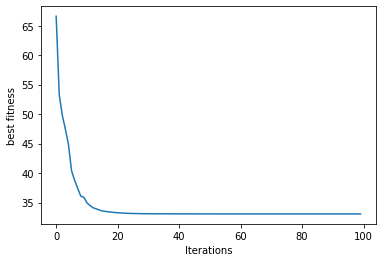

In [ ]:
plt.plot(plot_best)
plt.xlabel('Iterations')
plt.ylabel('best fitness')

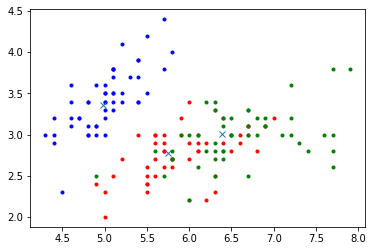

In [ ]:
plt.plot(data[label==0,0],data[label==0,1],'.b')
plt.plot(data[label==1,0],data[label==1,1],'.r')
center = X_best.reshape((n_cluster , dim_data))
plt.plot(center[:,0] , center[:,1],'x')

if datasetName == 'iris':
  plt.plot(data[label==2,0],data[label==2,1],'.g')

As clustering is a search problem, PSO can be used for searching through data to find centers. PSO finds a vector, while centers in our problem are $k$ distinguished vectors. Thus, the paper suggests finding a vector with $D\times k$ dimensions and changing it to $k$ vectors with D components.

#Use obtained centers as initial centers for Kmeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_cluster,n_init=1, init=center).fit(data)
new_centers = kmeans.cluster_centers_

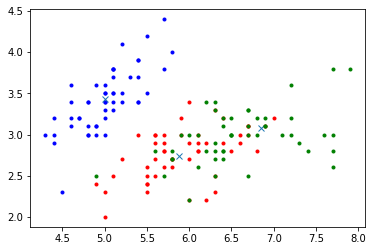

In [ ]:
plt.plot(data[label==0,0],data[label==0,1],'.b')
plt.plot(data[label==1,0],data[label==1,1],'.r')
plt.plot(new_centers[:,0] , new_centers[:,1],'x')

if datasetName == 'iris':
  plt.plot(data[label==2,0],data[label==2,1],'.g')

In [ ]:
getFitness(new_centers.reshape((-1)))

32.40828967795775

The paper suggests using found centroids by PSO in the previous step as initial points of Kmeans instead of random points.

4. (ACO) [2 points] Read the paper: Blum, Christian, and Marco Dorigo. ”Search bias in ant colony optimization: On the role of competition-balanced systems.” IEEE Transactions on Evolutionary Computation 9.2 (2005): 159-174. Figure 1 shows a (toy) problem instance for the 2-cardinality tree problem. The 2-cardinality tree problem amounts to finding a subtree T of a given undirected graph G with exactly 2 edges and the minimum possible weight.

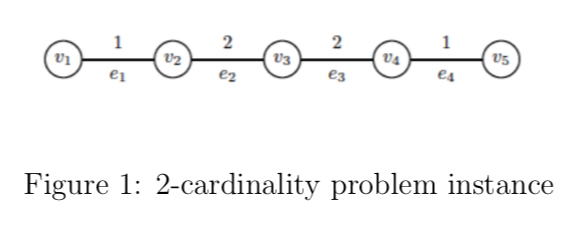







(a) Is ACO for this problem a Competition-Balanced System (CBS)? Justify your answer. (A definition of CBS also given in the slides.)

The ACO for this problem is not a Competition-Balanced System because some solution components in this cardinality problem occur in a larger number of feasible solutions. 

(b) If a combination of an ACO algorithm and a problem instance is not a CBS, is the induced bias always harmful? Justify your answer.

The combination of an ACO algorithm and a problem instance is not a CBS does not always imply a harmful induced bias. Some combinations have biases which are desirable - ex: First Order Deceptive Systems.

5. (ACO) [2 point] The figure below shows an example of an instance of a source- destination problem from the ACO book by Dorigo and Stuetzle. The goal is to reach the destination node from the source one using a shortest path through the given graph. What results do you expect for an ant colony algorithm that does not use tabu lists (except for inhibition of immediate return to the previous node)?

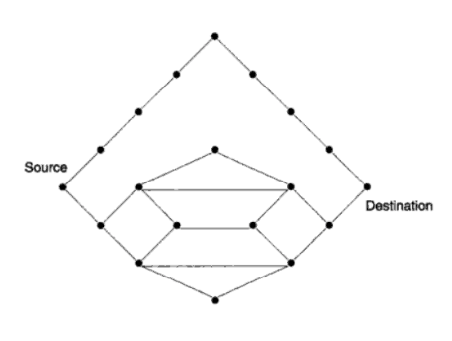